<a href="https://colab.research.google.com/github/hafilmr/LearningCodeTrainee/blob/main/ARIMA/ARIMA_Champagne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [ ]:
!pip install -U statsmodels

     |████████████████████████████████| 9.8 MB 5.2 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 5.5 MB/s 


In [ ]:
!wget nc https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv

--2022-02-04 10:13:22--  http://nc/
Resolving nc (nc)... failed: No address associated with hostname.
wget: unable to resolve host address ‘nc’
--2022-02-04 10:13:22--  https://lazyprogrammer.me/course_files/timeseries/perrin-freres-monthly-champagne.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1598 (1.6K) [text/csv]
Saving to: ‘perrin-freres-monthly-champagne.csv’

perrin-freres-month 100%[===================>]   1.56K  --.-KB/s    in 0s      

2022-02-04 10:13:23 (23.6 MB/s) - ‘perrin-freres-monthly-champagne.csv’ saved [1598/1598]

FINISHED --2022-02-04 10:13:23--
Total wall clock time: 0.4s
Downloaded: 1 files, 1.6K in 0s (23.6 MB/s)


In [ ]:
df = pd.read_csv(
    'perrin-freres-monthly-champagne.csv',
    index_col='Month',
    skipfooter=2,
    parse_dates=True
)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [ ]:
df.head()

,Perrin Freres monthly champagne sales millions ?64-?72
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [ ]:
df.columns = ['Sales']

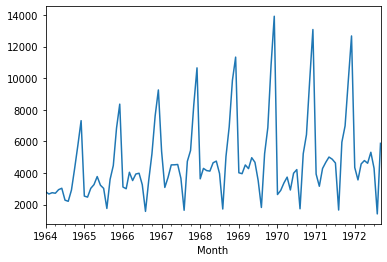

In [ ]:
df['Sales'].plot()

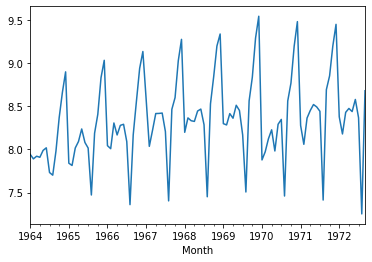

In [ ]:
df['LogSales'] = np.log(df['Sales'])
df['LogSales'].plot()

In [ ]:
df.index.freq = 'MS'

In [ ]:
Ntest = 12 # 12 cause we gonna to plot it by months
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [ ]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [ ]:
import pmdarima as pm

In [ ]:
model = pm.auto_arima(train['LogSales'],
                      trace=True,
                      suppress_warnings=True,
                      seasonal=True, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=-50.266, Time=2.24 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=-41.975, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=-54.968, Time=0.48 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=-53.384, Time=0.39 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=-34.700, Time=0.03 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=-44.102, Time=0.09 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=-52.971, Time=1.40 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=-52.991, Time=0.64 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=-55.117, Time=0.75 sec
 ARIMA(1,0,0)(0,1,2)[12] intercept   : AIC=-53.123, Time=1.86 sec
 ARIMA(1,0,0)(1,1,2)[12] intercept   : AIC=inf, Time=6.76 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=-50.817, Time=0.98 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=-56.123, Time=1.46 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=-44.178, Time=0.24 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   93
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood                  33.917
Date:                            Fri, 04 Feb 2022   AIC                            -57.834
Time:                                    10:14:28   BIC                            -45.862
Sample:                                         0   HQIC                           -53.031
                                             - 93                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0083      0.011      0.773      0.440      -0.013       0.029
ar.L1          0.8620      0.160      5.382      0.000       0.548       1.176
ma.L1         -0.6698      0.220     -3.045      0.002      -1.101      -0.239
ma.S.L12      -0.4796      0.116     -4.118      0.000      -0.708      -0.251
sigma2         0.0244      0.003      8.574      0.000       0.019       0.030
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                24.77
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                            -0.68
Prob(H) (two-sided):                  0.51   Kurtosis:                         5.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_pred = model.predict_in_sample(start=12, end=-1)
test_pred , confint = model.predict(n_periods=Ntest, return_conf_int=True)

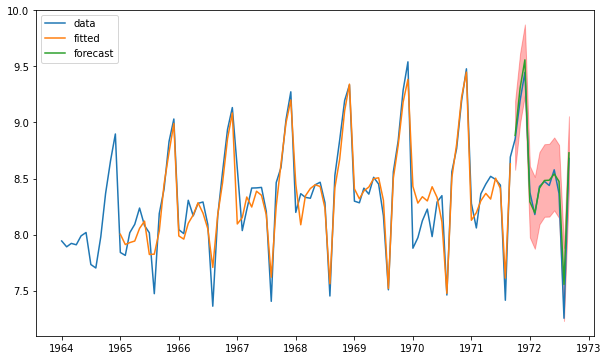

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['LogSales'], label='data')
ax.plot(train.index[12:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha = 0.3)
ax.legend();

our forecasts very closely matches the true Time series.

In [ ]:
#Compute R^2 Score
r2_score(test['Sales'], np.exp(test_pred))

0.9546942228798783

In [ ]:
model = pm.auto_arima(train['LogSales'],
                      trace=True, max_p=12, max_q=2, max_order=14,
                      suppress_warnings=True, stepwise=False,
                      seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=141.911, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.59 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=141.540, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.88 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.98 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=139.851, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=138.023, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.49 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.10 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=114.336, Time=0.38 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=114.576, Time=0.55 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=114.173, Time=0.20 

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   93
Model:              SARIMAX(12, 1, 1)   Log Likelihood                  24.907
Date:                Fri, 04 Feb 2022   AIC                            -19.814
Time:                        10:15:05   BIC                             18.013
Sample:                             0   HQIC                            -4.546
                                 - 93                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0091      0.015      0.605      0.545      -0.020       0.038
ar.L1         -0.0721      0.265     -0.272      0.786      -0.592       0.448
ar.L2         -0.1512      0.199     -0.761      0.446      -0.540       0.238
ar.L3         -0.0975      0.234     -0.416      0.677      -0.556       0.361
ar.L4         -0.2028      0.208     -0.977      0.328      -0.610       0.204
ar.L5         -0.1238      0.237     -0.522      0.601      -0.589       0.341
ar.L6         -0.1226      0.221     -0.554      0.580      -0.556       0.311
ar.L7         -0.0731      0.228     -0.321      0.748      -0.520       0.374
ar.L8         -0.2292      0.212     -1.082      0.279      -0.644       0.186
ar.L9         -0.1061      0.223     -0.476      0.634      -0.543       0.331
ar.L10        -0.1140      0.224     -0.510      0.610      -0.552       0.324
ar.L11        -0.0767      0.216     -0.356      0.722      -0.500       0.346
ar.L12         0.7170      0.189      3.800      0.000       0.347       1.087
ma.L1         -0.6959      0.298     -2.336      0.020      -1.280      -0.112
sigma2         0.0275      0.004      7.448      0.000       0.020       0.035
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                16.61
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                            -0.64
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
train_pred = model.predict_in_sample(start=1, end=-1)
test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True)

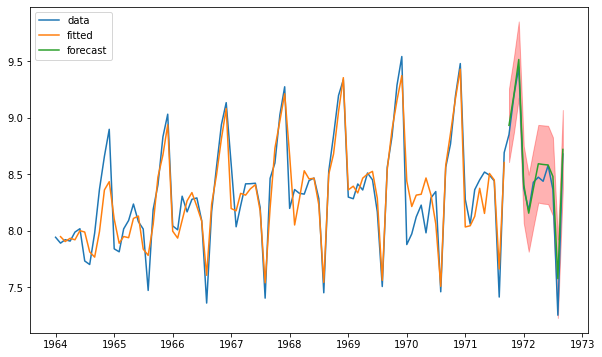

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['LogSales'], label='data')
ax.plot(train.index[1:], train_pred, label='fitted')
ax.plot(test.index, test_pred, label='forecast')
ax.fill_between(test.index, \
                confint[:,0], confint[:,1], \
                color='red', alpha=0.3)
ax.legend()

In [ ]:
r2_score(test['Sales'], np.exp(test_pred))

0.9716946486242174

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

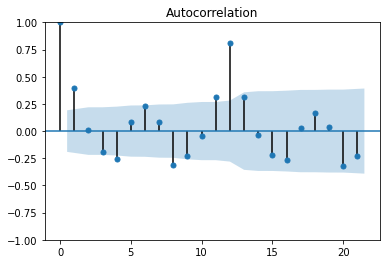

In [ ]:
plot_acf(df['LogSales']);

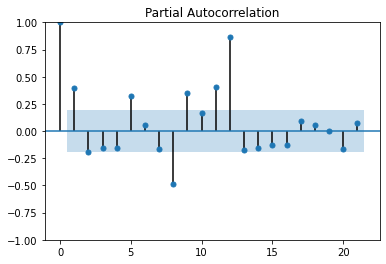

In [ ]:
plot_pacf(df['LogSales'], method='ols');

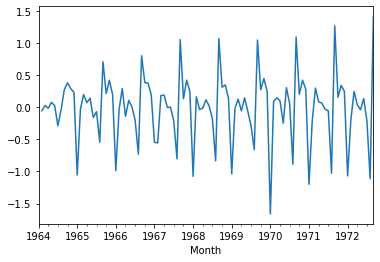

In [ ]:
df['LogSales'].diff().plot();

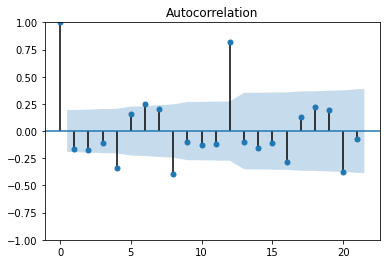

In [ ]:
plot_acf(df['LogSales'].diff().dropna());

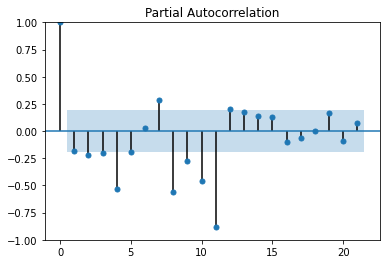

In [ ]:
plot_pacf(df['LogSales'].diff().dropna(), method='ols');

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
adfuller(df['LogSales'])

(-2.255118601284435,
 0.18685173111687048,
 13,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 -49.191437515830046)

In [ ]:
adfuller(df['LogSales'].diff().dropna())

(-4.460914465253633,
 0.0002312140464953588,
 12,
 91,
 {'1%': -3.50434289821397,
  '10%': -2.5840147047458037,
  '5%': -2.8938659630479413},
 -43.63799632128652)

In [ ]:
# from previous
def plot_fit_and_forecast(result, d=0, col='Sales'):
  fig, ax = plt.subplots(figsize=(10, 6))
  ax.plot(df[col], label='data')

  # plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index[d:], train_pred[d:], color='green', label='fitted')

  # forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color='red', alpha = 0.3)
  ax.legend()

  return forecast

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


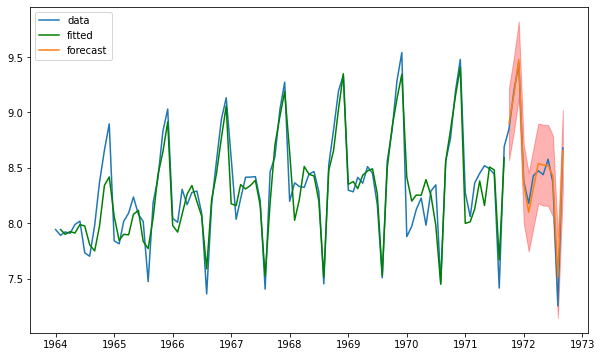

In [ ]:
arima = ARIMA(train['LogSales'], order=(12, 1, 2))
arima_result = arima.fit()
forecast = plot_fit_and_forecast(arima_result, d=1, col='LogSales')

In [ ]:
r2_score(test['Sales'], np.exp(forecast))

0.9866622810089092